In [1]:
import os
os.chdir("/home/branche/ML_TERM/gym-micropolis-ga/")
from mapPrinter import plotResults, getMapImage, saveMapInts
os.chdir("/home/branche/ML_TERM/gym-micropolis-ga/")
from MicropolisControlScript import Quimby
os.chdir("/home/branche/ML_TERM/gym-micropolis-ga/")
import numpy as np
import pickle 
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 5]
%matplotlib inline

# Genetic Algorithm to build micropolis city

We can load a save if we want, instead of re-training the GA

In [ ]:
q = pickle.load(open('saves/small_cross/c_split-m_0-p_20-cs_2-bestScore_6040.obj', 'rb'))

plt.rcParams['figure.figsize'] = [15, 5]
plotResults(q)

## Training the GA

In [2]:
# Parameters
map_size = 30
chromosome_len = 200
steps = 39 # For 5 years of simulation
nb_generations = 10
eval = "last"
n_population = 50

# The next parameters are interesting to cross map :
crossover = "split"
mutation_rate = 0
p_selection = 0.2
couple_size = 2
nb_splits = 1

# Run the algorithm
q = Quimby(map_w=map_size,map_h=map_size,chromosome_len=chromosome_len,n_population=n_population,n_steps_evaluation=steps)
q.ga(nb_generations=nb_generations, mutation_rate=mutation_rate, p_selection=p_selection, couple_size=couple_size,crossover=crossover, nb_splits=nb_splits, eval=eval)

### Displaying the learning results

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
mapSize:30, chromosome_len:200, n_population:50, n_steps_evaluation:39, nb_generations:10, eval:last
crossover:split, mutation_rate:0, p_selection:0.2, couple_size:2
best score in last gen = 7140


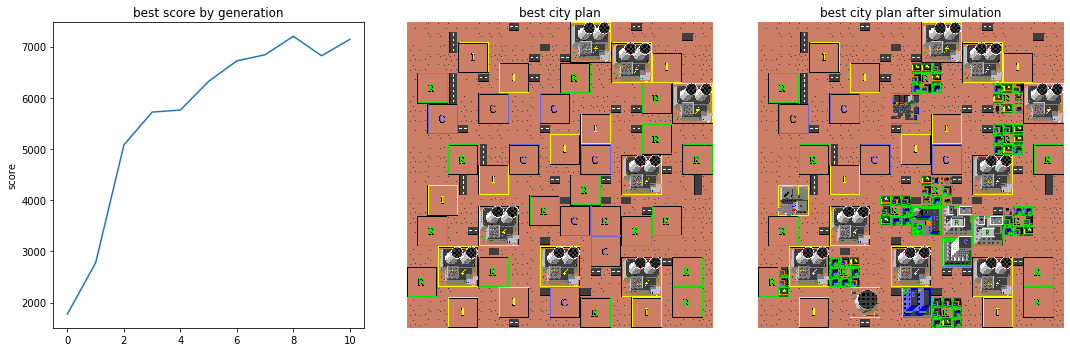

<Figure size 1080x360 with 0 Axes>

In [4]:
plt.rcParams['figure.figsize'] = [15, 5]
plotResults(q)

### Saving that Class
Saves population on file so that we can open it in a new notebook to display the results

In [5]:
pickle.dump(q, open("saves/demo_city.obj", 'wb') )

<hr>

# Visualize map and simulation

### Create control environment

In [6]:
from gym_micropolis.envs.corecontrol import MicropolisControl
from mapPrinter import printMapAscii, getMapImage, showMap
import random

Creates the MicropolisControl generic class to run the engine on the city plan. 
Make sure you have a Quimby class loaded into q for the variables

### Build the city blocks

In [7]:
# Let's pick the best city in our genome
city = q.genomes[np.argmax(q.populations)]

try:m.close()
except:pass
m = q.build_city(city=city, display=False)
avg_pop = 0
pop_run = 0

Show the pretty map

--------------------------------
|          #     NNNN  #       |
|    #           NNNN       #  |
|    #III     #  NNNNNNNN      |
|     III    #  #NNNNNNNNIII   |
|     III III   RRR  NNNNIII   |
| RRR#  # III#  RRR  NNNNIII   |
| RRR#    III   RRR     RRRNNNN|
| RRR#  CCC   CCC       RRRNNNN|
|  CCC  CCC   CCC    # #RRRNNNN|
|  CCC  CCC   CCC III      NNNN|
|  CCC#       #   III  #RRR    |
|              IIIIII   RRR    |
|    RRR#  CCC IIICCC   RRR RRR|
|    RRR#  CCC IIICCC NNNN  RRR|
|    RRRIIICCC    CCC NNNN# RRR|
|     # III    # RRR# NNNN   # |
|  III# III      RRR  NNNN   # |
|  III       RRR#RRR# #        |
|  III  NNNN RRRCCCRRR  #RRR   |
| RRR   NNNN RRRCCCRRRRRRRRR   |
| RRR  #NNNN    CCCRRRRRRRRR   |
| RRR   NNNN  #    CCCRRR      |
|   NNNN #    NNNN CCC         |
|   NNNNRRR   NNNN CCCNNNN#RRR |
|RRRNNNNRRR   NNNN # #NNNN RRR |
|RRRNNNNRRR   NNNN    NNNN RRR |
|RRR      III #CCC#   NNNN RRR |
|    III  III  CCCRRR  III RRR |
|    III  III  CCCRRR  III RRR |
|    III  

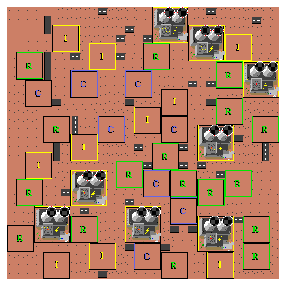

In [8]:
printMapAscii(m.getTileMap())
showMap(m)

In [9]:
print("year:",m.engine.cityYear,", month:", m.engine.cityMonth)
print("cityPop=",m.engine.cityPop,", cityScore=", m.engine.cityScore)

year: 1900 , month: 0
cityPop= 0 , cityScore= 500


### Run simulation and display  results

year: 2118 , month: 4
cityPop= 9440 , cityScore= 383


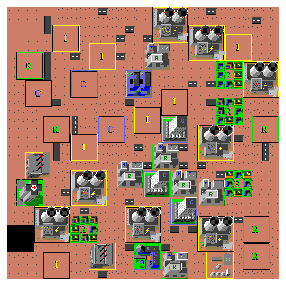

In [52]:
# Run simulation for steps
for i in range(39) :
    m.engine.simTick()

print("year:",m.engine.cityYear,", month:", m.engine.cityMonth)
print("cityPop=",m.engine.cityPop,", cityScore=", m.engine.cityScore)
showMap(m)

In [53]:
m.close()

# Generate GAN maps

In [ ]:
import os
os.chdir("/home/branche/ML_TERM/gym-micropolis-ga/")
from mapPrinter import getMapImage, saveMapInts
os.chdir("/home/branche/ML_TERM/gym-micropolis-ga/")
from MicropolisControlScript import Quimby
os.chdir("/home/branche/ML_TERM/gym-micropolis-ga/")
import numpy as np
import pickle

In [ ]:
# Parameters
map_size = 64
chromosome_len = 200
steps = 39 # For 5 years of simulation
nb_generations = 10
eval = "last"
n_population = 50

# The next parameters are interesting to cross map :
crossover = ["switch", "split"]
mutation_rate = [0, 0.2, 0.5]
p_selection = [0.2]
couple_size = [2, 5]
# nb_splits = [1, 5]

savepath="saves/gan_cross/"
filename=""

if not os.path.exists(savepath):
    os.makedirs(savepath)

In [ ]:
for c in crossover:
    for mr in mutation_rate:
        for p in p_selection:
            for cs in couple_size:
                
                filename = "c_"+c+"-m_"+str(int(100*mr))+"-p_"+str(int(100*p))+"-cs_"+str(cs)
                print(filename)
                
                # Run the algorithm
                q = Quimby(map_w=map_size,map_h=map_size,chromosome_len=200,n_population=n_population,n_steps_evaluation=steps)
                q.ga(nb_generations=nb_generations, mutation_rate=mr, p_selection=p, couple_size=cs,crossover=c, eval=eval)
                
                score = q.pop_progression[-1]
                filename = filename + "-bestScore_"+str(score)
                
                # Save the quimby class
                pickle.dump(q, open(savepath+filename+".obj", 'wb') )
                
                # Generate all the maps and save them
                for cityindex in range(len(q.genomes)):

                    cityname = filename+"-city_"+str(cityindex)+"-score_"+str(q.populations[cityindex])
                    # print("    "+cityname)
                    
                    m = q.build_city(city=q.genomes[cityindex], display=False)
                    
                    getMapImage(m.getTileMap()).save(savepath+cityname+".png","PNG")
                    saveMapInts(m.getTileMap(), savepath+cityname+".npy")
                    
                    m.close()
             

# Create a image from ints

In [ ]:
from mapPrinter import getMapImage, showMap
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir("/home/branche/ML_TERM/gym-micropolis-ga/")

mat = np.load("saves/small_cross/c_split-m_0-p_20-cs_2-bestScore_6040-city_0-score_6040.npy")

In [ ]:
showMap(mat,True)